# Analisis de Base de datos de música


![](https://c.tenor.com/iczjaEFdW20AAAAC/spotify-music.gif)

Detalles del Conjunto de Datos\
Conjunto de Datos de las Canciones más Escuchadas en Spotify
Este conjunto de datos contiene información exhaustiva sobre algunas de las canciones más escuchadas en Spotify, enriquecida con información adicional de otras plataformas de streaming populares como Apple Music, Deezer y Shazam. Es ideal para analistas musicales, científicos de datos y entusiastas del aprendizaje automático que estén interesados en explorar tendencias y características de las canciones populares.

## Características del Conjunto de Datos

### Información Básica de la Canción:
- track_name: Nombre de la canción.
- artist(s)_name: Nombre del artista o artistas que interpretan la canción.
- artist_count: Número de artistas que contribuyen a la canción.
- released_year, released_month, released_day: Detalles de la fecha de lanzamiento.

### Métricas de Streaming:
- in_spotify_playlists: Número de listas de reproducción de Spotify en las que se incluye la canción.
- in_spotify_charts: Rango de la canción en las listas de éxitos de Spotify.
- streams: Número total de reproducciones en Spotify.
- in_apple_playlists, in_apple_charts: Presencia en listas de reproducción y listas de éxitos de Apple Music.
- in_deezer_playlists, in_deezer_charts: Presencia en listas de reproducción y listas de éxitos de Deezer.
- in_shazam_charts: Rango en las listas de éxitos de Shazam.
Atributos Musicales:
- bpm: Tiempo por minuto, que representa el ritmo de la canción.
- key: Tono de la canción.
- mode: Indica si la canción está en modo mayor o menor.
- danceability_%: Aptitud de la canción para bailar.
- valence_%: Positividad del contenido musical de la canción.
- energy_%: Nivel de energía percibida de la canción.
- acousticness_%: Presencia de sonido acústico en la canción.
- instrumentalness_%: Proporción de contenido instrumental en la pista.
- liveness_%: Presencia de elementos de actuación en vivo.
- speechiness_%: Cantidad de palabras habladas en la canción.


Fuente: Kaggle
<div style="text-align: left; margin: 20px;">  
  <a href="https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs" target="_blank" style="font-size: 24px; font-weight: bold; color: blue;">Dataset de Spotify</a>  
</div>


## ✨ Autor  
👨‍💻 **Frank Yesid**  
📌 *Creador de este cuaderno interactivo*  
📧 Contacto: [fyzapatac@gmail.com](mailto:fyzapatac@gmail.com)  
🚀 *Este cuaderno ha sido diseñado para ayudarte a aprender y aplicar conceptos clave de programación y análisis de datos de manera práctica.* ¡Espero que lo disfrutes! 🎯

In [40]:
# @title Conexión con la base de datos desde una URL

#@markdown - Forma 1 de descarga de archivos desde Google Drive con wget
# Forma de descarga de archivos desde Google Drive con wget
# Se requiere el uso de cookies para la autenticación
# Se debe obtener el ID del archivo de Google Drive para poder descargarlo
# Se usa el comando wget para descargar el archivo, gestionando las cookies
# param url: URL de la base de datos
# param nombre_archivo: Nombre del archivo a guardar

# URL = 'https://drive.google.com/file/d/1spKQPvUR3PcOgebEXzWDhohxEN0sW2Dg/view?usp=sharing'
# Definir el ID del archivo de Google Drive
FILEID = '1spKQPvUR3PcOgebEXzWDhohxEN0sW2Dg'
nombre_archivo = 'Spotify_Most_Streamed_Songs.csv'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "Spotify_Most_Streamed_Songs.csv" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt


--2025-03-01 21:12:10--  https://docs.google.com/uc?export=download&confirm=&id=1spKQPvUR3PcOgebEXzWDhohxEN0sW2Dg
Resolving docs.google.com (docs.google.com)... 108.177.98.102, 108.177.98.139, 108.177.98.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1spKQPvUR3PcOgebEXzWDhohxEN0sW2Dg&export=download [following]
--2025-03-01 21:12:10--  https://drive.usercontent.google.com/download?id=1spKQPvUR3PcOgebEXzWDhohxEN0sW2Dg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156547 (153K) [application/octet-stream]
Saving to: ‘Spotify_Most_Streamed_Songs.csv’

Spotify_Most_Stream 100%[=================

In [41]:
#@markdown - Forma 2 de descarga de archivos desde la misma fuente de datos
# instalar la librería kagglehub para descargar archivos desde Kaggle
%pip install kagglehub

import os
import shutil
# Forma de descarga de archivos desde la misma fuente de datos
import kagglehub

# Conectar con kaggle
FILEID = '1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99'
nombre_archivo = 'kaggle.json'
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt

# Crear la carpeta .kaggle si no existe
os.makedirs("/root/.kaggle", exist_ok=True)

# Mover el archivo kaggle.json a la ubicación correcta
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Ajustar permisos
os.chmod("/root/.kaggle/kaggle.json", 600)

# Download latest version
path = kagglehub.dataset_download("abdulszz/spotify-most-streamed-songs")
# Imprimir la ruta de los archivos descargados
print("Path to dataset files:", path)


--2025-03-01 21:12:17--  https://docs.google.com/uc?export=download&confirm=&id=1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99
Resolving docs.google.com (docs.google.com)... 108.177.98.102, 108.177.98.139, 108.177.98.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99&export=download [following]
--2025-03-01 21:12:17--  https://drive.usercontent.google.com/download?id=1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65 [application/octet-stream]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      65  --.-KB/s    in 0s

# Desglose:

- FILEID = '1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99': El ID del archivo de Google Drive que se desea descargar.
- Primera llamada wget:
Obtiene un token de confirmación cuando Google Drive requiere verificación extra para archivos grandes o descargados muchas veces.\
Usa sed para buscar y extraer el token de la respuesta de Google Drive.
- Segunda llamada wget:
Con el token, se realiza la descarga final del archivo.\
rm -rf /tmp/cookies.txt: Limpia las cookies temporales después de completar la descarga.

In [42]:
# @title Instalar librerias a usar
!pip install pandas-profiling
%pip install sweetviz
%pip install missingno

In [43]:
# @title Carga de librerias
# Bibliotecas utilizadas
# ----------------------------------------------------------------------------
# pandas (pd): librería para el análisis de datos
# matplotlib (plt): librería para crear gráficos
# seaborn (sns): librería para visualizar datos de manera estética
# Sweetviz (sw): Una biblioteca de análisis y visualización de datos en Python.
# files : Importa la función para subir y descargar archivos en Google Colab.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sw
from google.colab import files
import numpy as np
import missingno as msno

In [44]:
# @title Cargamos las funciones relacionadas
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)


# Sección 1

### Paso 1: Cargar el archivo CSV

In [45]:
# @title Cargar el archivo CSV de canciones de Spotify
# Ubicación en donde se almacena en drive
file_path_drive = 'Spotify_Most_Streamed_Songs.csv'
spotify_df = pd.read_csv(file_path_drive)

# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos de Spotify:")
spotify_df.head()


Primeras 5 filas de los datos de Spotify:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [46]:
# Ubicación en donde se almacena la base de datos de kaggle

path = "/root/.cache/kagglehub/datasets/abdulszz/spotify-most-streamed-songs/versions/2"
print(os.listdir(path))


['Spotify Most Streamed Songs.csv']


In [47]:
# Ubicación en donde se almacena en drive
file_path_drive = path+'/Spotify Most Streamed Songs.csv'
spotify_df = pd.read_csv(file_path_drive)

# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos de Spotify:")
spotify_df.head()


Primeras 5 filas de los datos de Spotify:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [48]:
# @title Visualización de composición de la base de datos.
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Paso 2: Explorar los datos

Vamos a verificar la estructura de los datos, la cantidad de filas y columnas, así como cualquier dato vacío.

In [49]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {spotify_df.shape}")

Forma de los datos (filas, columnas): (953, 25)


In [50]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(spotify_df.dtypes)


Tipos de datos por columna:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object


In [51]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(spotify_df.nunique())



Valores únicos por columna:
track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
cover_url               535
dtype: int64


In [52]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(spotify_df.isnull().sum())



Datos faltantes por columna:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


In [53]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(spotify_df)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,track_name,953,943,0,0.00000,953
1,artist(s)_name,953,645,0,0.00000,953
2,artist_count,953,8,0,0.00000,953
3,released_year,953,50,0,0.00000,953
4,released_month,953,12,0,0.00000,953
5,released_day,953,31,0,0.00000,953
6,in_spotify_playlists,953,879,0,0.00000,953
7,in_spotify_charts,953,82,0,0.00000,953
8,streams,953,949,0,0.00000,953
9,in_apple_playlists,953,234,0,0.00000,953


In [54]:
# @title Realizamos la descriptiva estadística
spotify_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<Axes: >

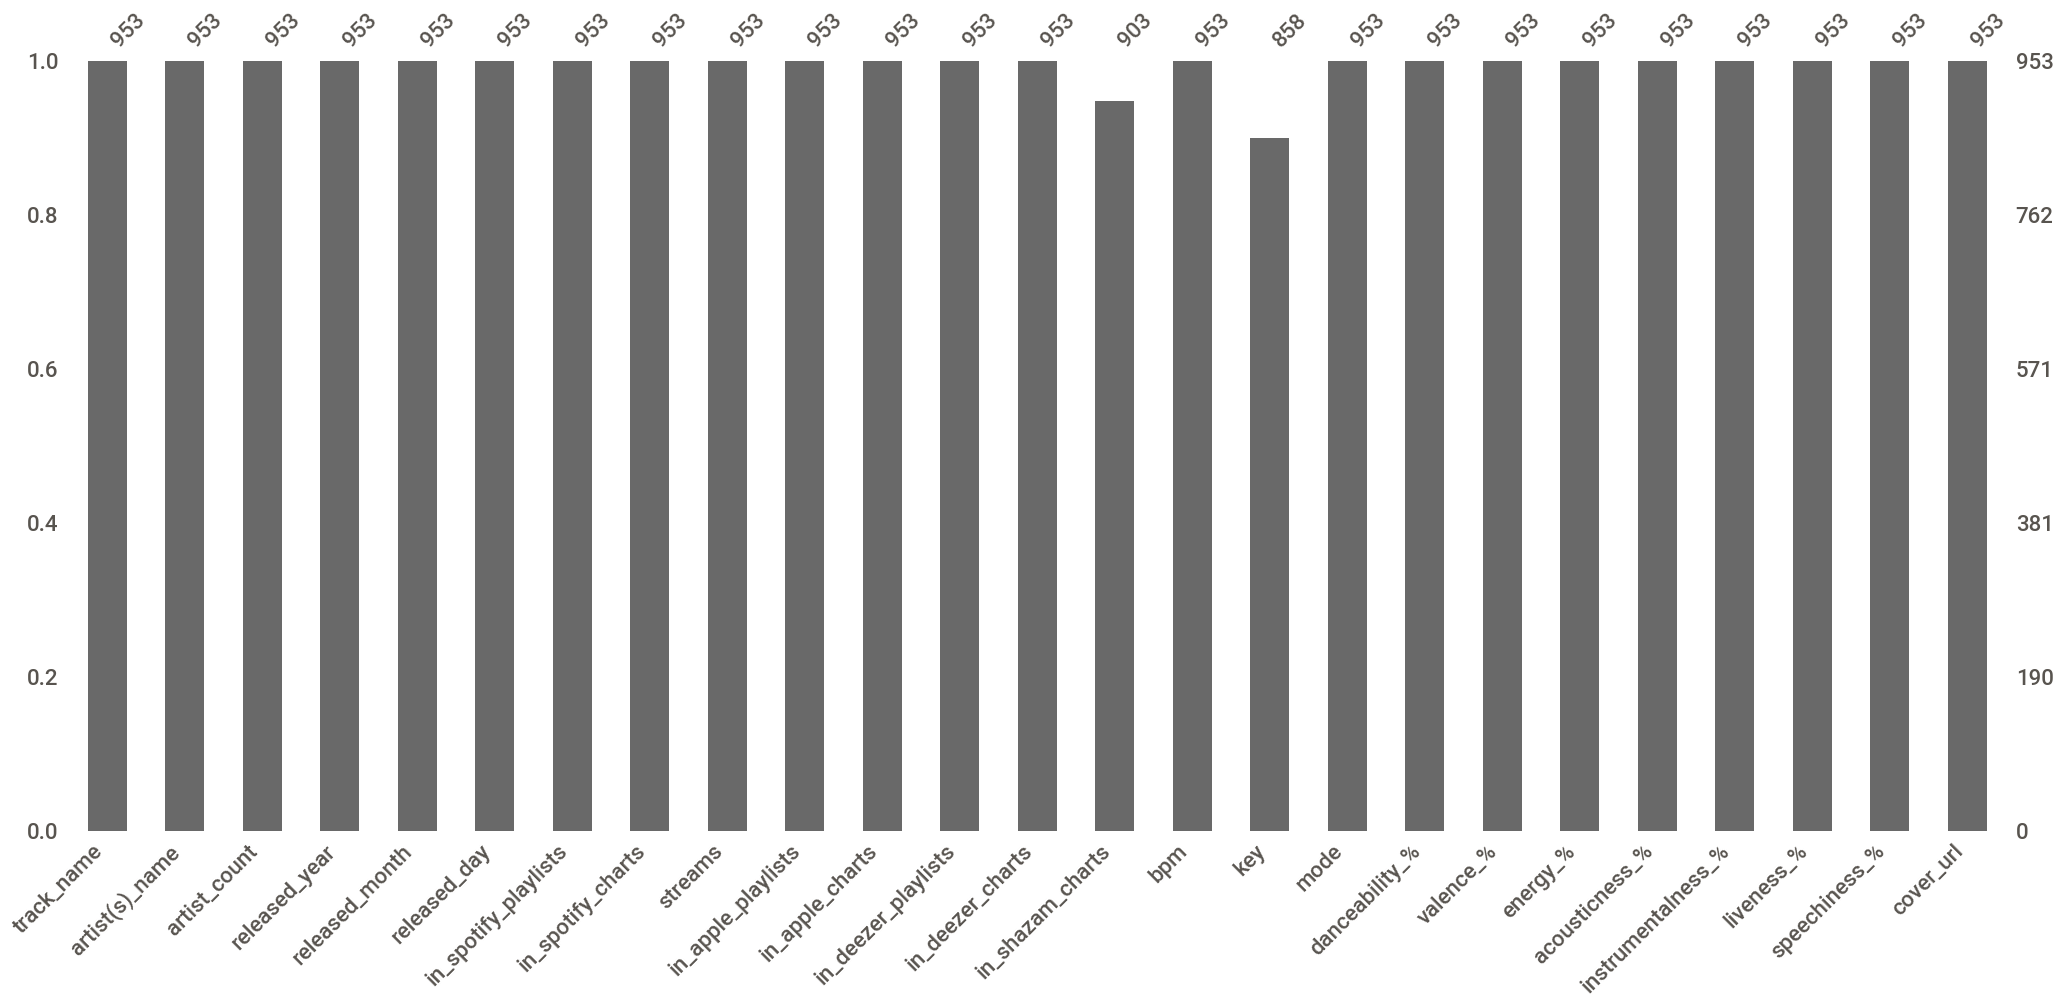

In [55]:
# Visualizar valores nulos con un gráfico de barras
msno.bar(spotify_df)


<Axes: >

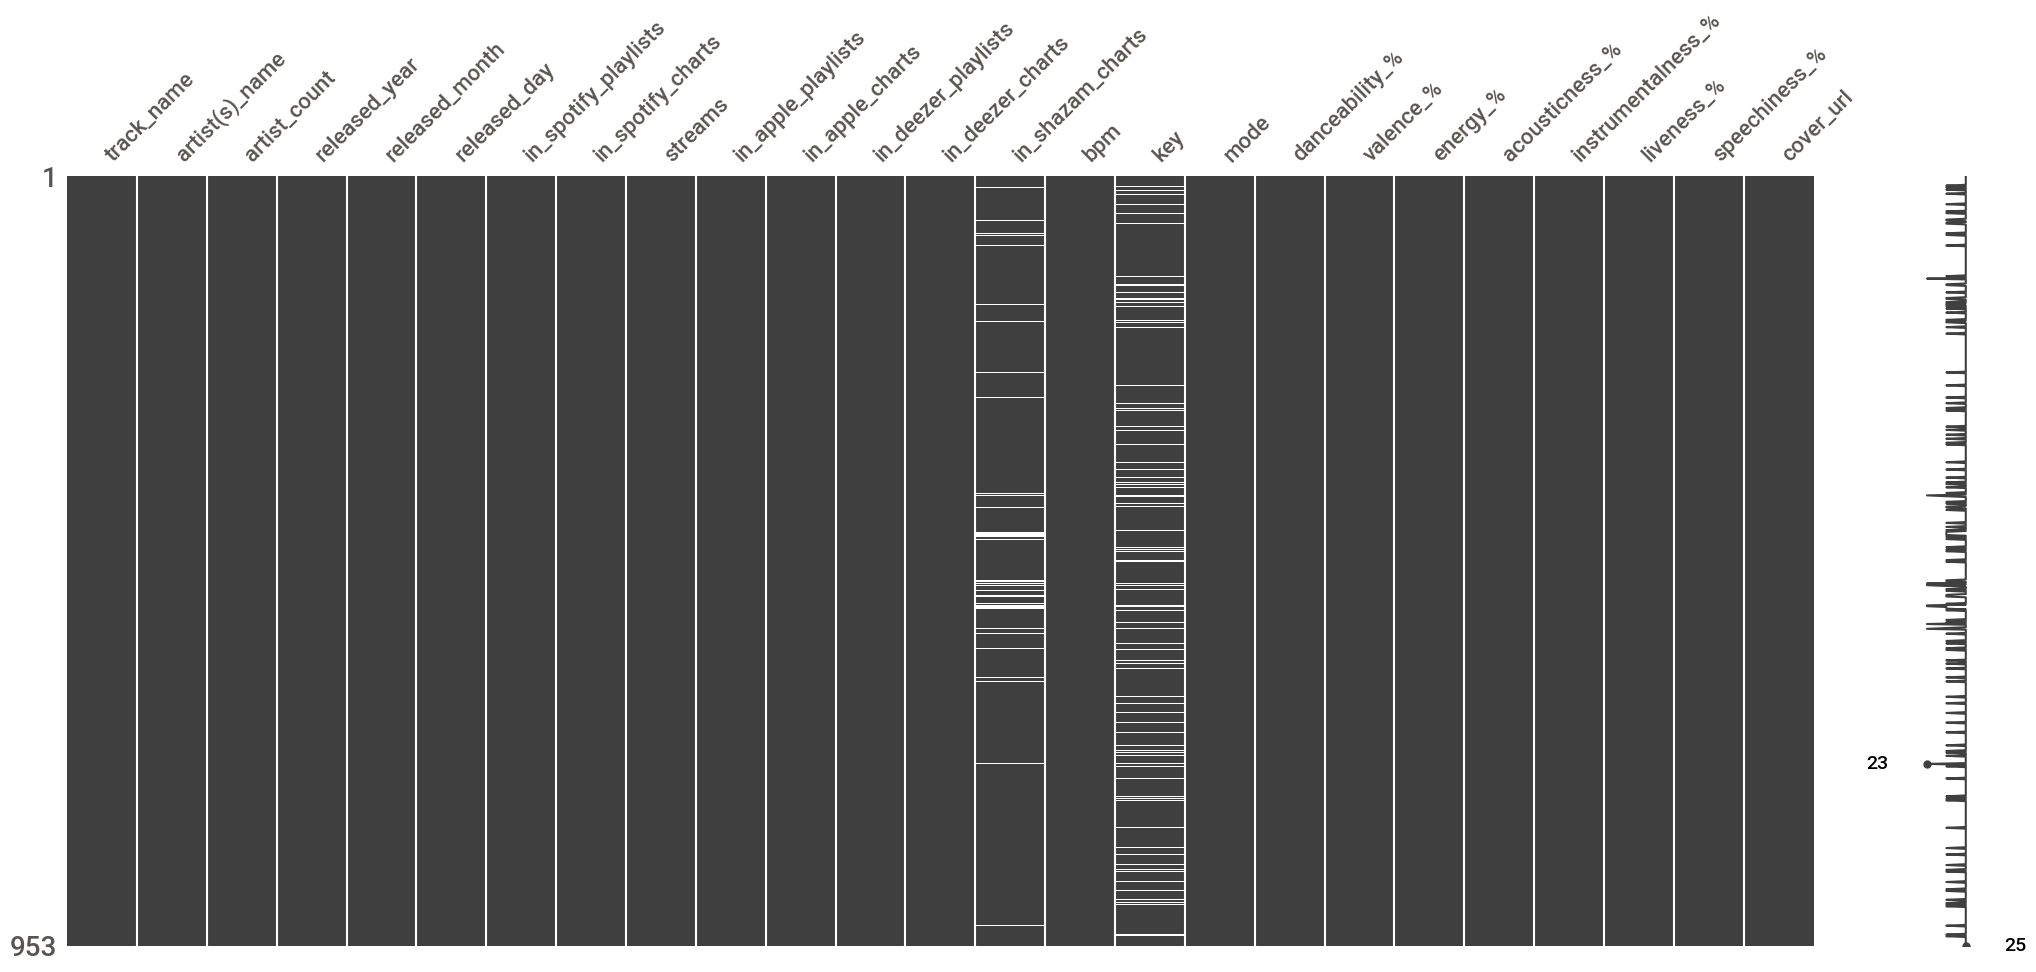

In [56]:
# Visualizar matriz de valores faltantes
msno.matrix(spotify_df)

<Axes: >

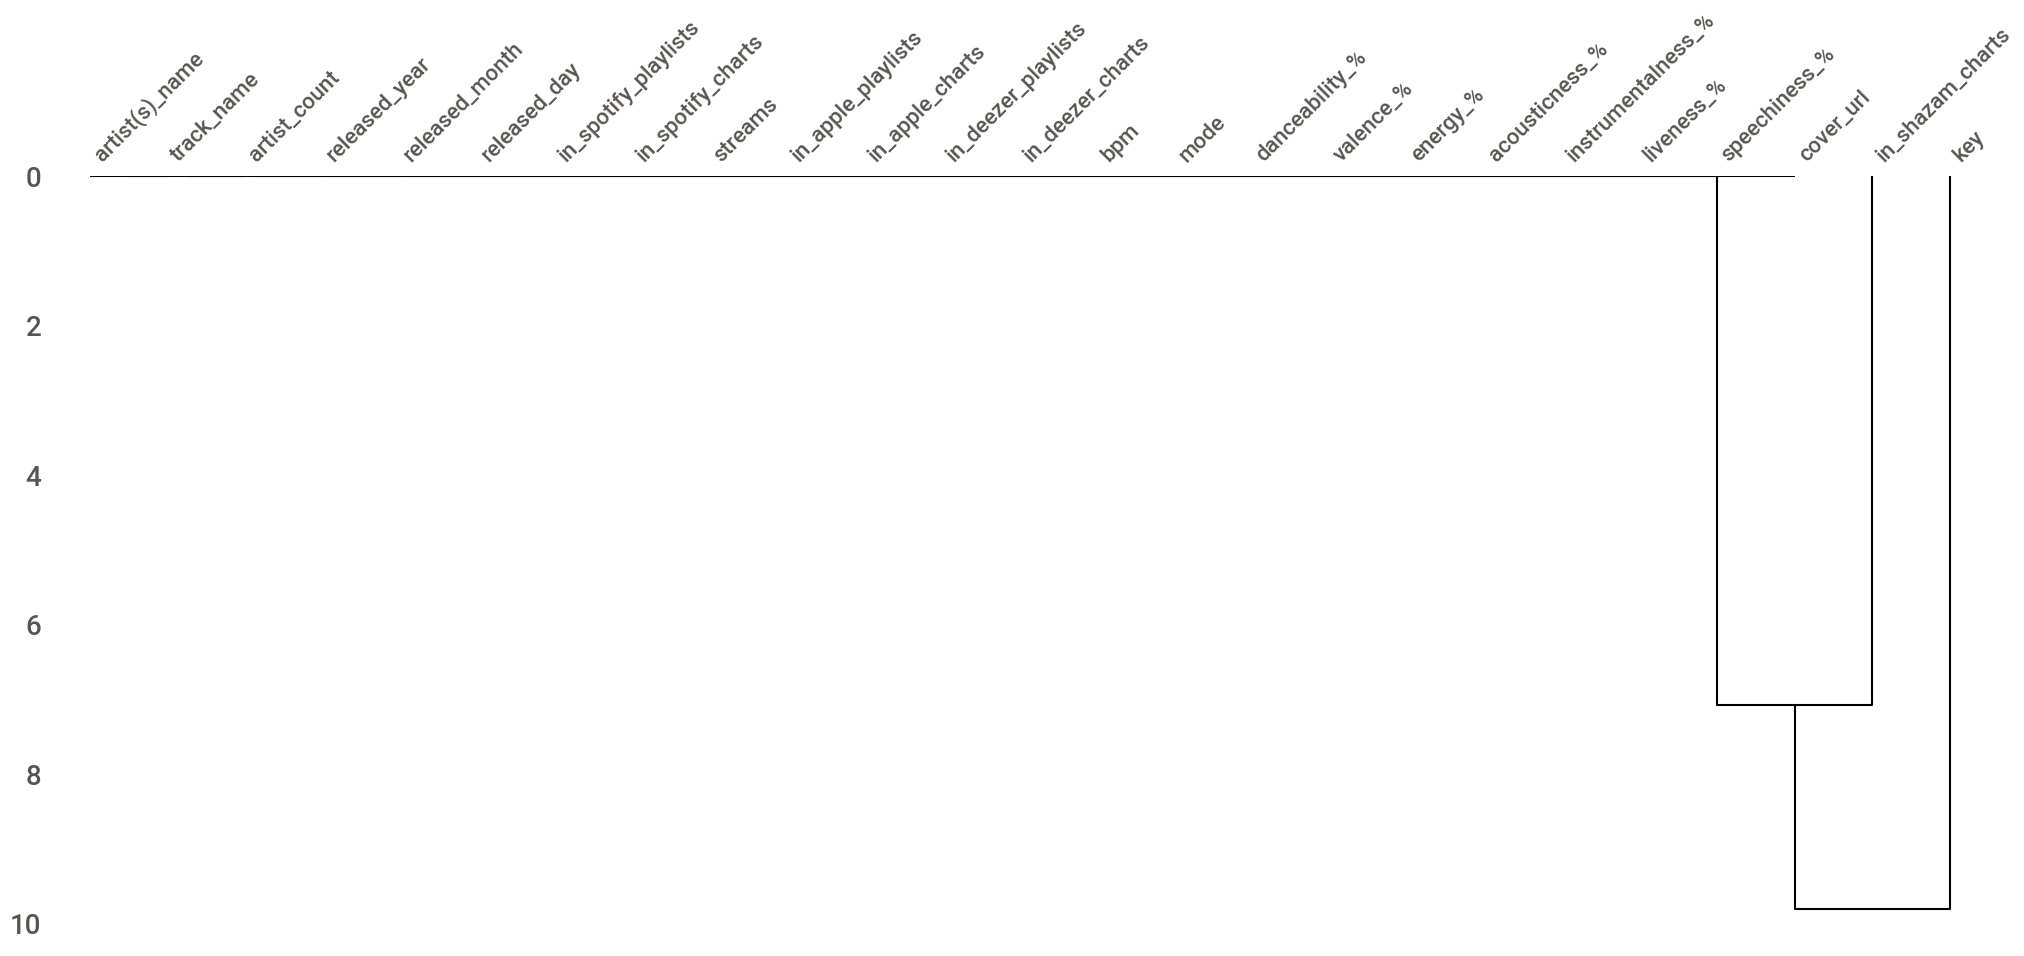

In [57]:
# Visualizar dendrograma para identificar patrones de valores faltantes
msno.dendrogram(spotify_df)

# Sección 2

### Paso 3: Graficar distribuciones


Ahora, vamos a generar gráficos para visualizar algunas características de las canciones, como la distribución de la popularidad, la cantidad de reproducciones, y cualquier otra métrica relevante.

In [58]:
# @title Visualización de cantidad de canciones por artista
spotify_df['artist(s)_name'].value_counts(ascending=False)

,count
artist(s)_name,
Taylor Swift,34
The Weeknd,22
Bad Bunny,19
SZA,19
Harry Styles,17
...,...
"Karol G, Ovy On The Drums",1
"Coolio, L.V.",1
Kordhell,1


In [59]:
# @title seleccionamos los 10 primeros
Cantidad_de_artistas = 10
spotify_df['artist(s)_name'].value_counts(ascending=False).iloc[:Cantidad_de_artistas]


,count
artist(s)_name,
Taylor Swift,34
The Weeknd,22
Bad Bunny,19
SZA,19
Harry Styles,17
Kendrick Lamar,12
Morgan Wallen,11
Ed Sheeran,9
BTS,8


In [60]:
# @title seleccionamos los últimos 10
Cantidad_de_artistas = 10
spotify_df['artist(s)_name'].value_counts(ascending=False).iloc[-Cantidad_de_artistas:
                                                                ]



,count
artist(s)_name,
"Brray, Rauw Alejandro, Lyanno",1
"Duki, NICKI NICOLE, Cris Mj, Standly, Stars Music Chile",1
Jack Black,1
Mac DeMarco,1
The Walters,1
"Karol G, Ovy On The Drums",1
"Coolio, L.V.",1
Kordhell,1
Kenia OS,1


#### Visualización de la información disponible:

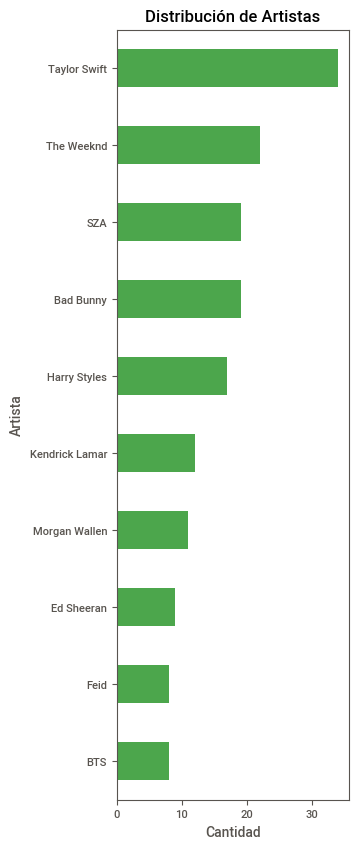

In [61]:
# @title 3.1 Histograma de la Popularidad
# Crear el gráfico Histograma seleccionando los 10 primeros artistas
Cantidad_de_artistas = 10
spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].sort_values().plot(kind='barh', figsize=(3, 10), color='green', alpha=0.7)

# Agregar título y etiquetas
plt.title('Distribución de Artistas')
plt.xlabel('Cantidad')
plt.ylabel('Artista')

# Mostrar el gráfico
plt.show()

4.

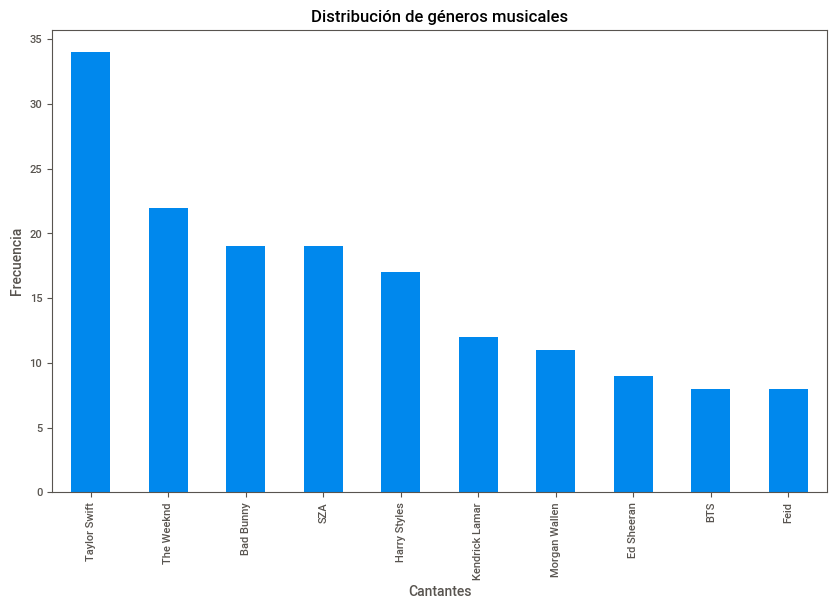

In [62]:
# @title Distribución de géneros musicales
Cantidad_de_artistas = 10
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].plot(kind='bar')
plt.title('Distribución de géneros musicales')
plt.xlabel('Cantantes')
plt.ylabel('Frecuencia')
plt.show()


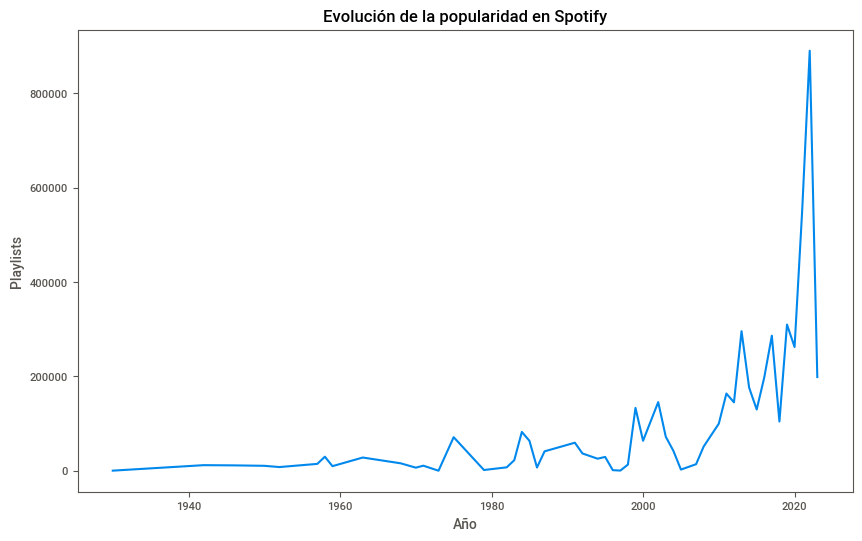

In [63]:
#@title Evolución de la popularidad en Spotify
plt.figure(figsize=(10, 6))
spotify_df.groupby('released_year')['in_spotify_playlists'].sum().plot(kind='line')
plt.title('Evolución de la popularidad en Spotify')
plt.xlabel('Año')
plt.ylabel('Playlists')
plt.show()


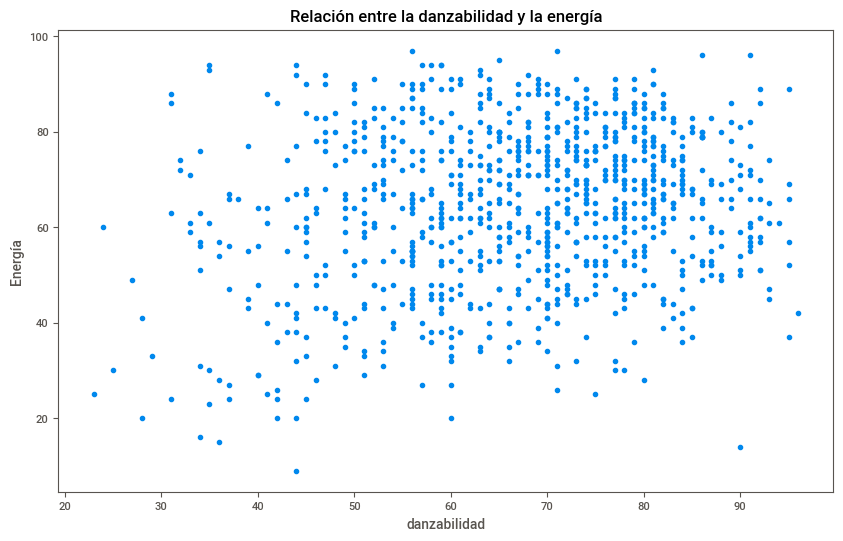

In [64]:
#@title Relación entre la danzabilidad y la energía
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['danceability_%'], spotify_df['energy_%'])
plt.title('Relación entre la danzabilidad y la energía')
plt.xlabel('danzabilidad')
plt.ylabel('Energía')
plt.show()

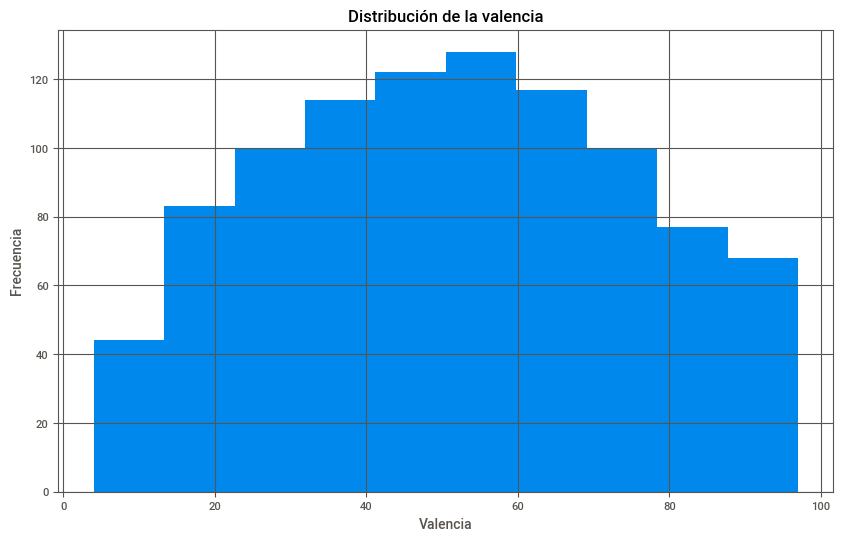

In [65]:
#@title Distribución de la valencia
plt.figure(figsize=(10, 6))
spotify_df['valence_%'].hist()
plt.title('Distribución de la valencia')
plt.xlabel('Valencia')
plt.ylabel('Frecuencia')
plt.show()


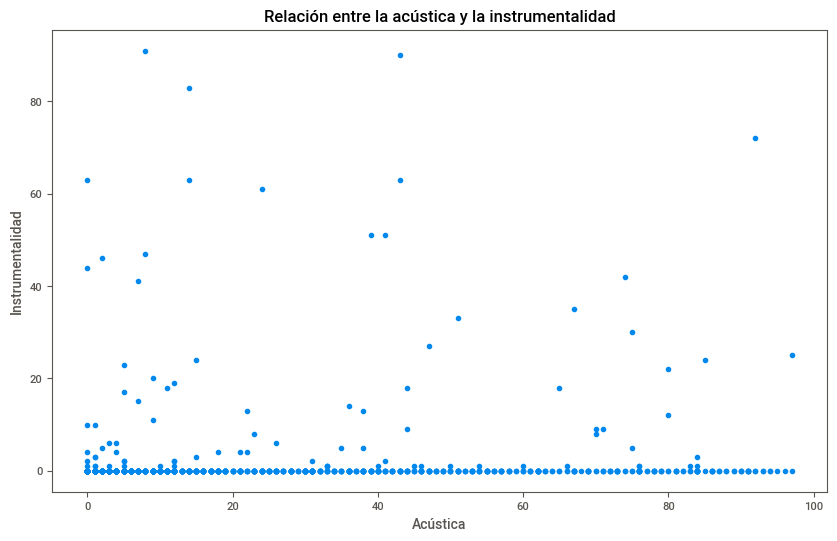

In [66]:
#@title Relación entre la acústica y la instrumentalidad
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['acousticness_%'], spotify_df['instrumentalness_%'])
plt.title('Relación entre la acústica y la instrumentalidad')
plt.xlabel('Acústica')
plt.ylabel('Instrumentalidad')
plt.show()


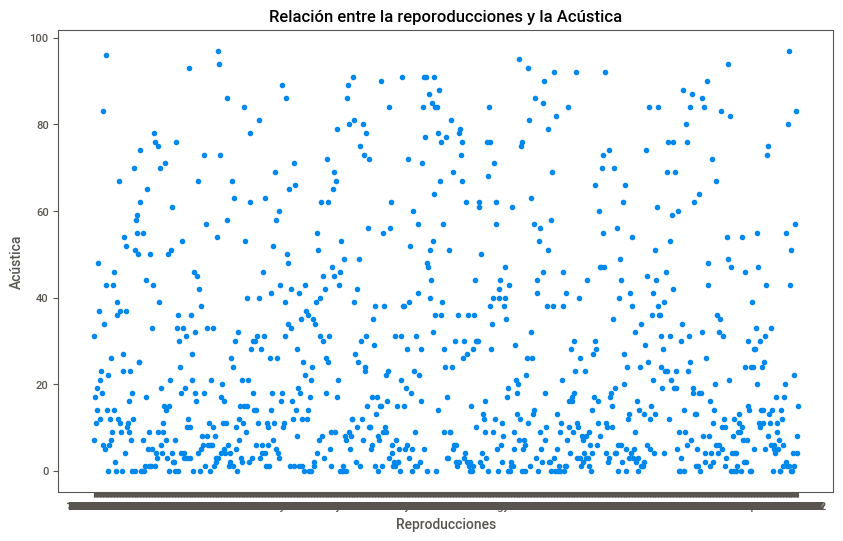

In [67]:
#@title Relación entre la reproducciones y la Acústica
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['streams'], spotify_df['acousticness_%'])
plt.title('Relación entre la reporoducciones y la Acústica')
plt.ylabel('Acústica')
plt.xlabel('Reproducciones')
plt.show()


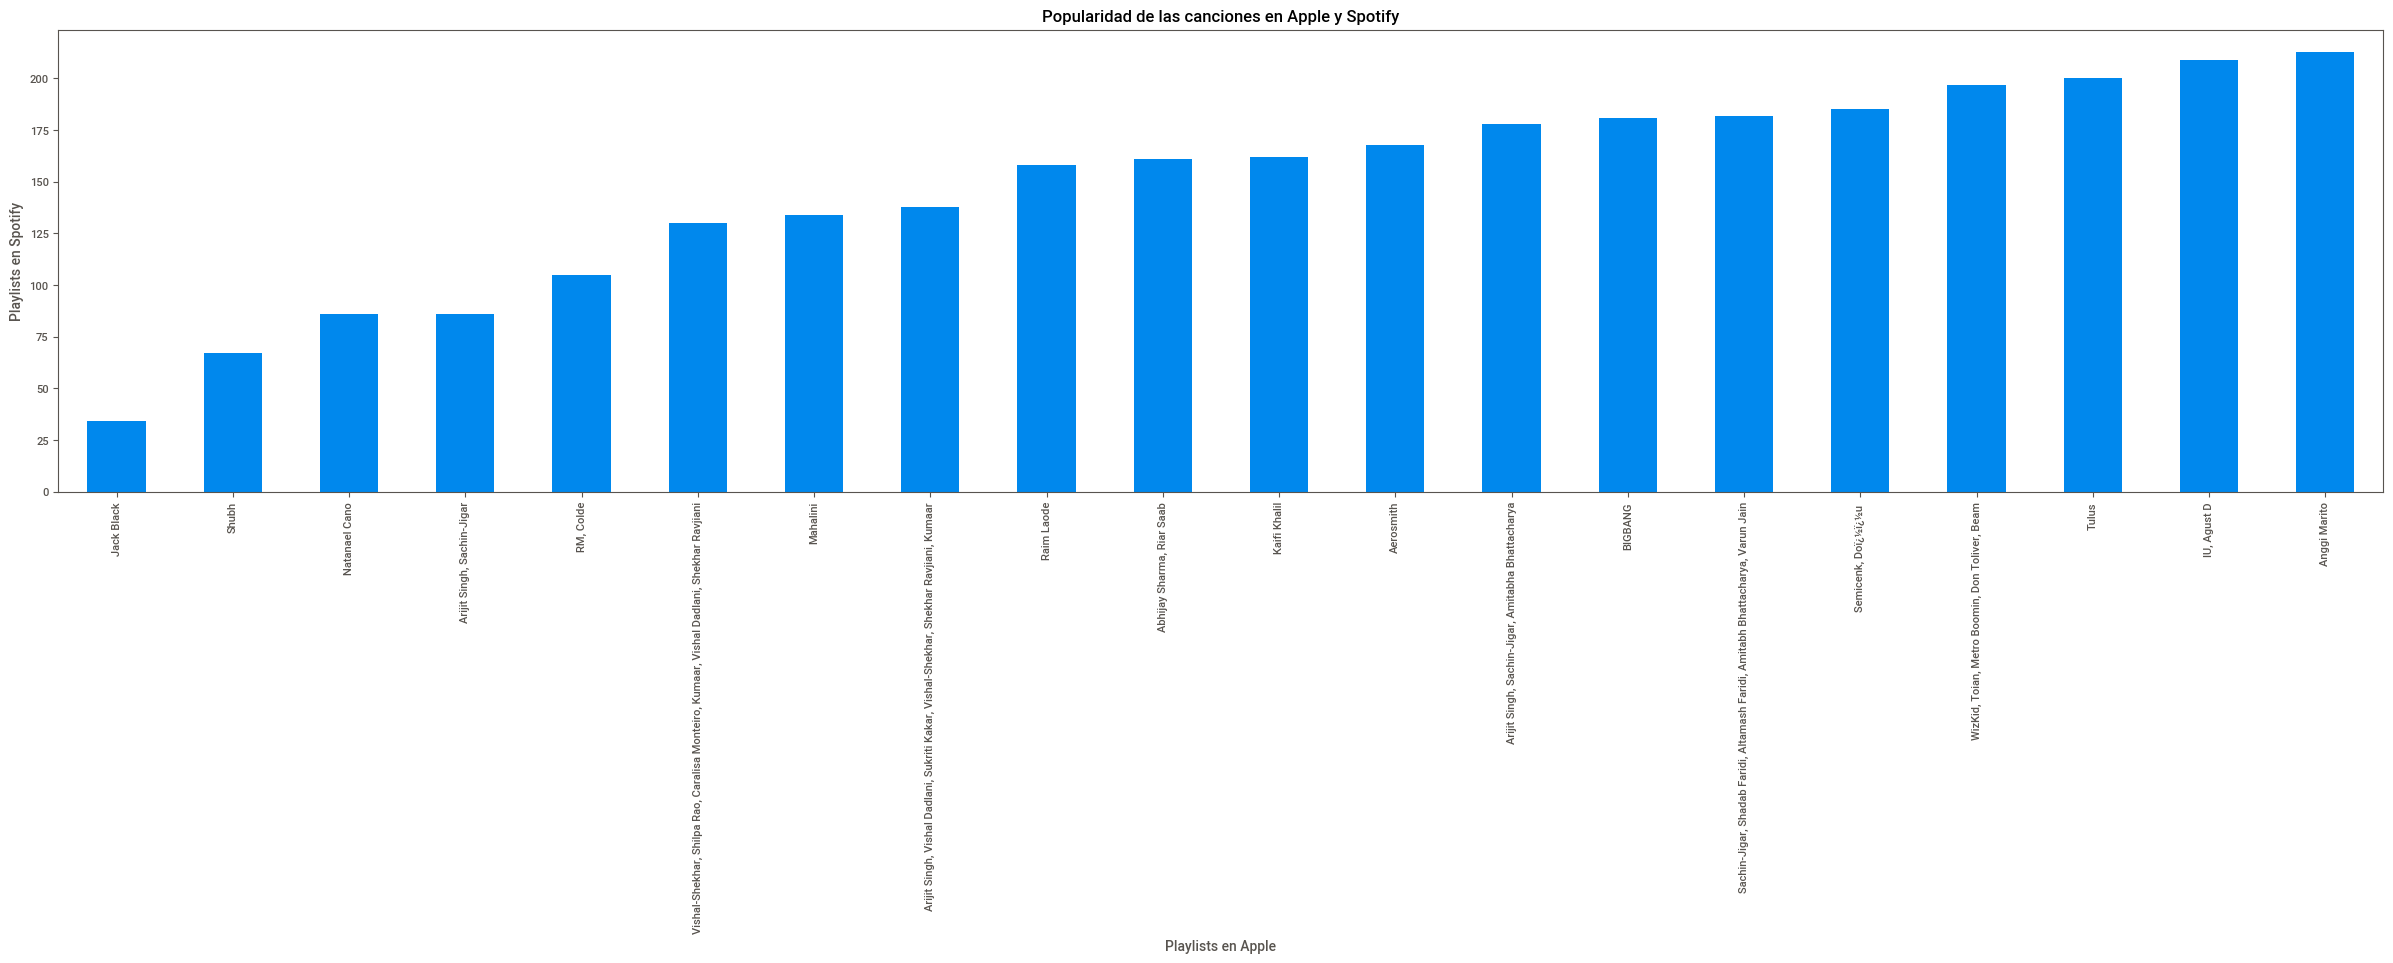

In [68]:
#@title Popularidad de las canciones en Apple y Spotify
plt.figure(figsize=(30, 6))
Cantidad_de_artistas = 20
spotify_df.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values().iloc[:Cantidad_de_artistas].plot(kind='bar')
plt.title('Popularidad de las canciones en Apple y Spotify')
plt.xlabel('Playlists en Apple')
plt.ylabel('Playlists en Spotify')
plt.show()

In [69]:
# @title como seleccionar los artistas con más canciones
spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].index.tolist()

['Taylor Swift',
 'The Weeknd',
 'Bad Bunny',
 'SZA',
 'Harry Styles',
 'Kendrick Lamar',
 'Morgan Wallen',
 'Ed Sheeran',
 'BTS',
 'Feid',
 'Drake, 21 Savage',
 'Labrinth',
 'Olivia Rodrigo',
 'NewJeans',
 'Doja Cat',
 'Billie Eilish',
 'Drake',
 'IVE',
 'Arctic Monkeys',
 'Karol G']

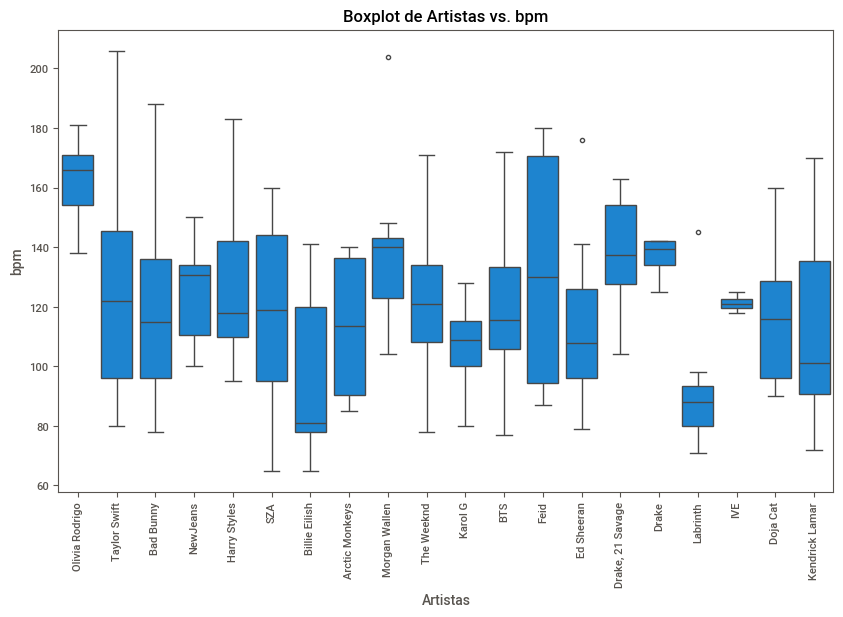

In [70]:
# @title Grafica de Boxplot composición de la base de datos
plt.figure(figsize=(10, 6))
# Seleccionar los cantantes con mayor cantidad de canciones
nombres_artistas = spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].index.tolist()

sns.boxplot(x='artist(s)_name', y='bpm', data=spotify_df[spotify_df['artist(s)_name'].isin(nombres_artistas)])
plt.title('Boxplot de Artistas vs. bpm')
plt.xlabel('Artistas')
plt.ylabel('bpm')
plt.xticks(rotation=90)
plt.show()


In [71]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = spotify_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
conf_matrix = numeric_cols.corr()

# Mostrar la matriz de correlación
conf_matrix


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.087586,0.037995,-0.017549,-0.101966,-0.018507,-0.051074,-0.088597,-0.003732,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
released_year,0.087586,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.198998,-0.035842,0.095389,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819
released_month,0.037995,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.000164,-0.019064,-0.005286,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838
released_day,-0.017549,0.174282,0.080313,1.000000,-0.079669,0.021877,0.026410,0.011086,0.073288,-0.030177,0.048951,0.042779,0.050545,-0.005788,0.019280,0.001566,-0.015826
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.708277,0.271317,0.144342,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.233354,0.552232,0.600205,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,1.000000,0.414523,0.369032,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.414523,1.000000,0.383668,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_charts,-0.003732,0.095389,-0.005286,0.073288,0.144342,0.600205,0.369032,0.383668,1.000000,0.028036,0.070913,0.076196,0.094627,-0.029361,0.005398,-0.007568,-0.080555
bpm,-0.038375,-0.005334,-0.039252,-0.030177,-0.019598,0.034713,0.023725,0.030962,0.028036,1.000000,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260


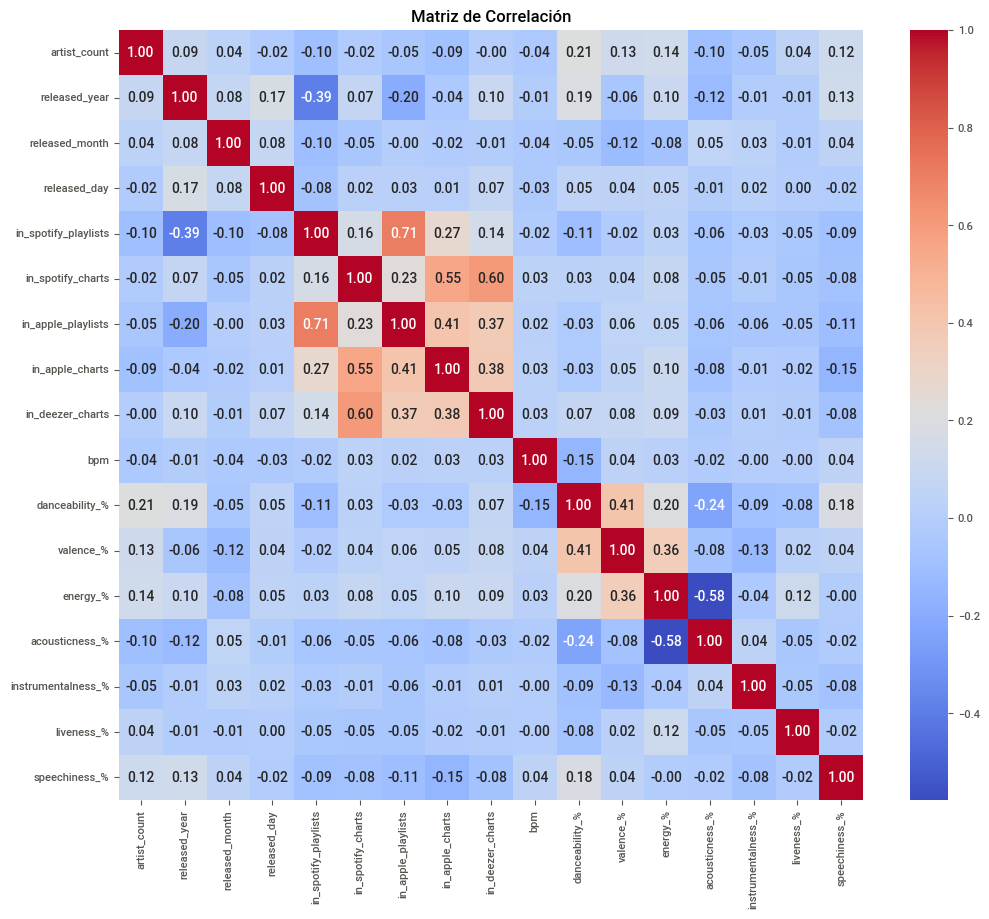

In [72]:
# @title Visualización de la correlación entre variables numéricas
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [73]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'Spotify'
advert_report = sw.analyze([spotify_df, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_spotify.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_spotify.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_spotify.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: NO


In [74]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

In [75]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

In [76]:
# Visualizando la variación del bpm
spotify_df.bpm.describe()

,bpm
count,953.000000
mean,122.540399
std,28.057802
min,65.000000
25%,100.000000
50%,121.000000
75%,140.000000
max,206.000000


In [77]:
#@title Calcular la media de la columna 'bpm'
media_bpm = spotify_df.bpm.mean()

# Seleccionar registros por encima de la media
registros_encima_media = spotify_df[spotify_df.bpm > media_bpm]

# Seleccionar registros por debajo de la media
registros_debajo_media = spotify_df[spotify_df.bpm < media_bpm]

# Mostrar la cantidad de registros en cada grupo
print(f"Registros por encima de la media: {len(registros_encima_media)}")
print(f"Registros por debajo de la media: {len(registros_debajo_media)}")

# Puedes trabajar con estos nuevos DataFrames 'registros_encima_media' y 'registros_debajo_media'
# para realizar análisis específicos sobre los registros que cumplen cada condición.


Registros por encima de la media: 448
Registros por debajo de la media: 505


In [78]:
# @title Segmentación de base de datos
# Selección de registros con bpm
# @markdown Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
base1 = 'registros_encima_media_bpm'
base2 = 'registros_debajo_media_bpm'
advert_report = sw.compare([registros_encima_media, base1], [registros_debajo_media, base2]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_spoptify_comparativa_bpm.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_spoptify_comparativa_bpm.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_spoptify_comparativa_bpm.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: NO


In [90]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

In [80]:
# @title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,43,263,10,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,48,126,14,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,94,207,14,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,116,207,12,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,84,133,15,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,61,13,1,144,60,24,39,57,0,8,3
949,1,2022,10,21,1180,0,4,0,0,166,42,7,24,83,1,12,6
950,2,2022,11,3,573,0,2,0,0,92,80,81,67,4,0,8,6
951,3,2022,10,20,1320,0,29,26,0,97,82,67,77,8,0,12,5


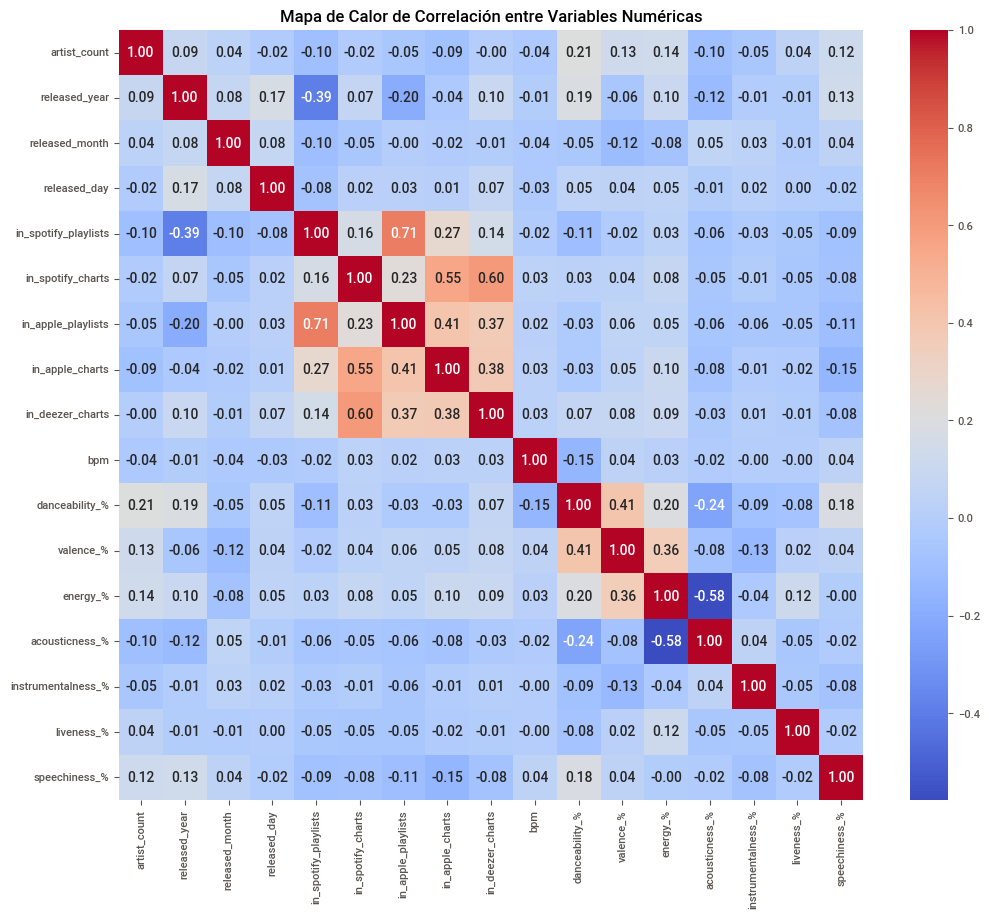

In [81]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = spotify_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


In [82]:
# @title La función describe() en pandas es utilizada para obtener un resumen estadístico de las columnas numéricas de un DataFrame.

# Resumen estadístico:

# count: número de valores no nulos
# mean: media aritmética
# std: desviación estándar
# min: valor mínimo
# 25%: percentil 25 (cuartil inferior)
# 50%: percentil 50 (media)
# 75%: percentil 75 (cuartil superior)
# max: valor máximo

numeric_cols.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


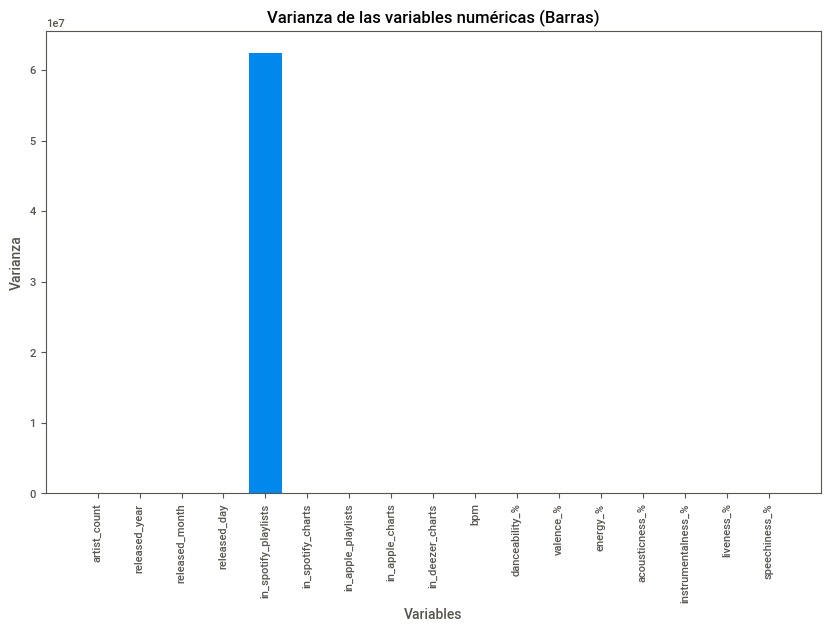

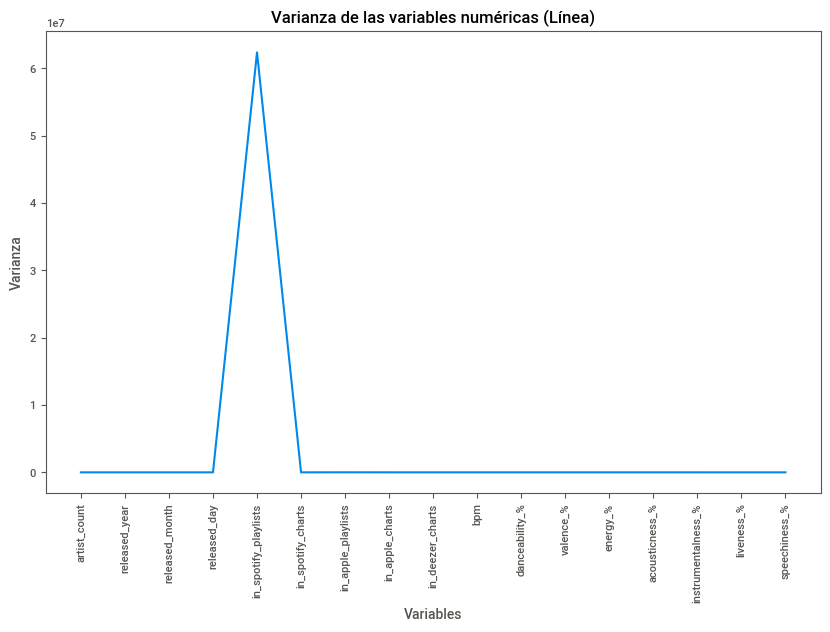

In [83]:
#@title visualizar la varianza de las variables numericas con numeric_cols.var() en barras y en linea juntas

# Calcular la varianza de las columnas numéricas
variance = numeric_cols.var()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Barras)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Línea)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()


In [84]:
# @title selección de columnas con mayor varianza
numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

,in_spotify_playlists,in_apple_playlists,in_apple_charts,bpm
0,553,43,263,125
1,1474,48,126,92
2,1397,94,207,138
3,7858,116,207,170
4,3133,84,133,144
...,...,...,...,...
948,953,61,13,144
949,1180,4,0,166
950,573,2,0,92
951,1320,29,26,97


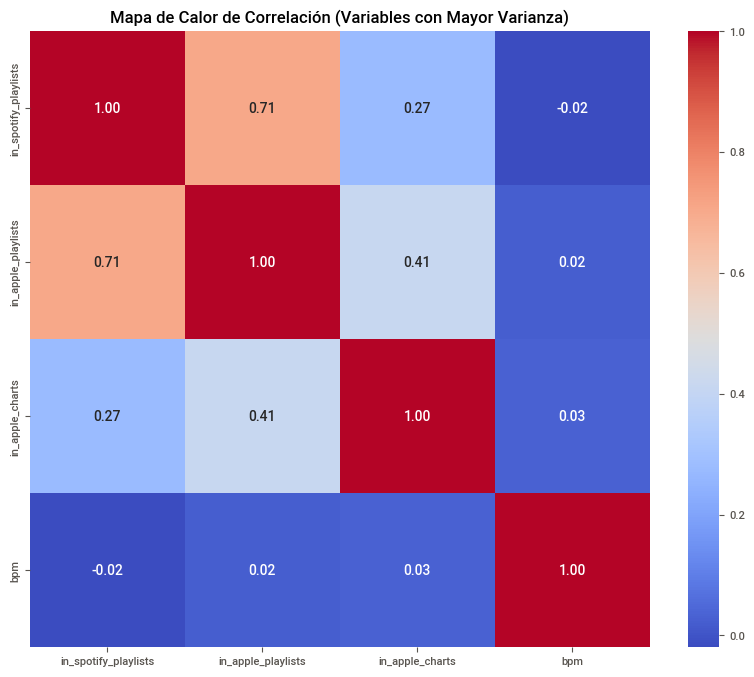

In [85]:
#@title visualizar mapa de calor entre 2 variables numericas, con mayor variabilidad

# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Calcular la matriz de correlación para las columnas seleccionadas
correlation_matrix_high_variance = numeric_cols_high_variance.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_high_variance, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación (Variables con Mayor Varianza)')
plt.show()


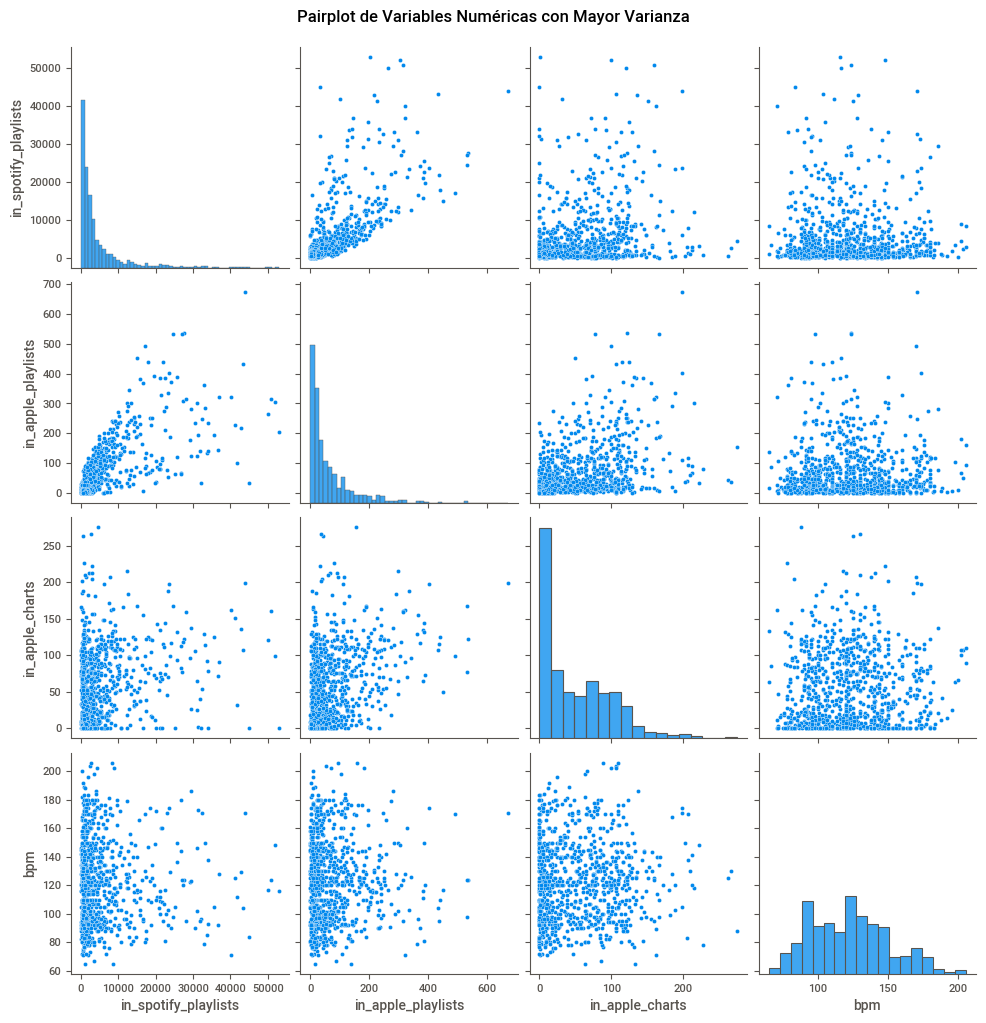

In [86]:
# @title graficas para variables numéricas lo siguiente sns.pairplot(tips) y que seleccione una cantidad de variables con mayor variación

# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Crear el pairplot con Seaborn para las columnas seleccionadas
sns.pairplot(numeric_cols_high_variance)
plt.suptitle('Pairplot de Variables Numéricas con Mayor Varianza', y=1.02)
plt.show()


In [87]:
numeric_cols_high_variance

,in_spotify_playlists,in_apple_playlists,in_apple_charts,bpm
0,553,43,263,125
1,1474,48,126,92
2,1397,94,207,138
3,7858,116,207,170
4,3133,84,133,144
...,...,...,...,...
948,953,61,13,144
949,1180,4,0,166
950,573,2,0,92
951,1320,29,26,97


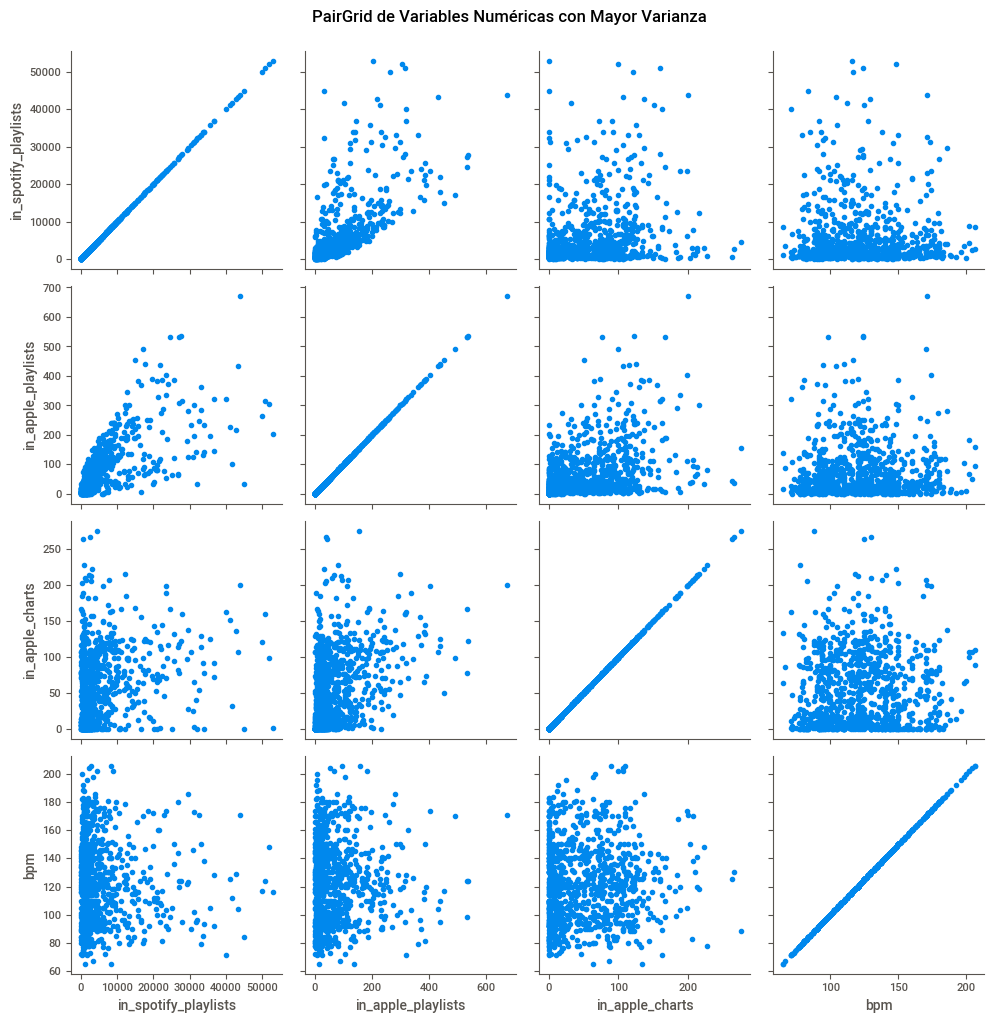

In [88]:
# @title Grafica
# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Crear el PairGrid con Seaborn para las columnas seleccionadas
g = sns.PairGrid(numeric_cols_high_variance)
g.map(plt.scatter)
plt.suptitle('PairGrid de Variables Numéricas con Mayor Varianza', y=1.02)
plt.show()


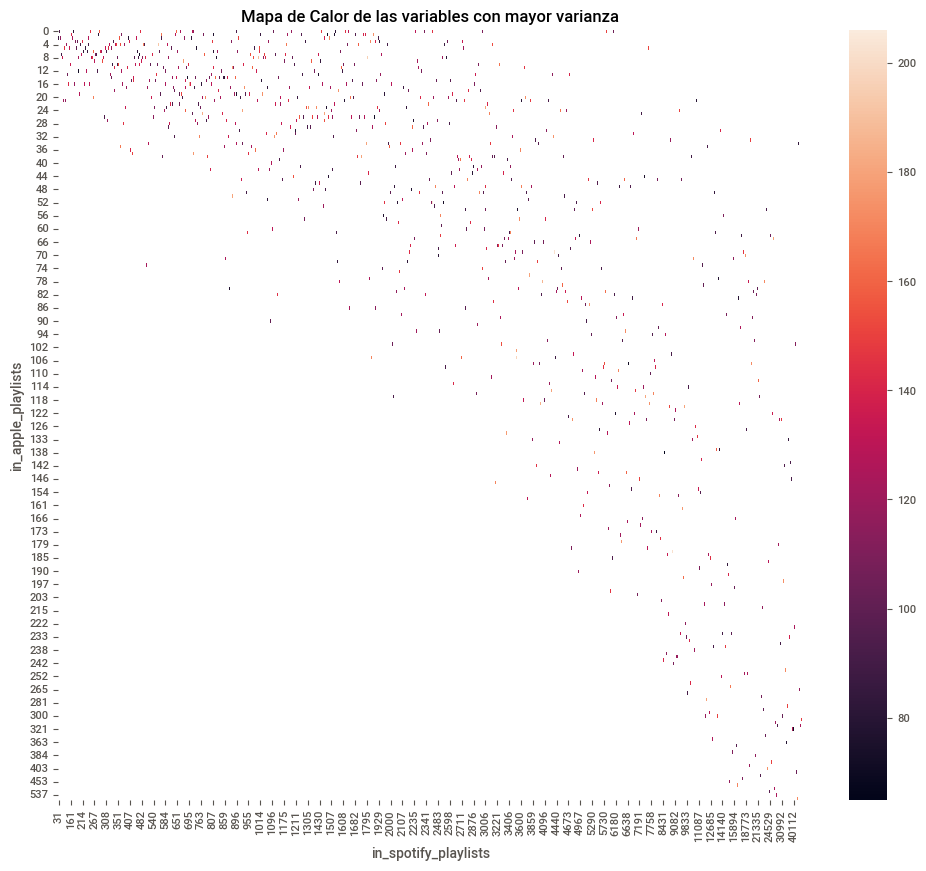

In [89]:
#@title graficar las variables

# Crear una tabla dinámica con las columnas seleccionadas
pvflights = spotify_df.pivot_table(values='bpm', index='in_apple_playlists', columns='in_spotify_playlists')

# Crear el mapa de calor con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(pvflights)
plt.title('Mapa de Calor de las variables con mayor varianza')
plt.show()


![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)